# Prediksi Harga Berlian

## Data preparation (EDA)


### Import library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

### Menampilkan data

In [4]:
df = pd.read_csv('order.csv')

print(f"Ukuran dataset: {df.shape}")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

Ukuran dataset: (49999, 12)
Jumlah baris: 49999
Jumlah kolom: 12


In [5]:
#Buat codingan tampilkan data data teratas
df.head()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
0,2e7a8482f6fb09756ca50c10d7bfc047,2,f293394c72c9b5fafd7023301fc21fc2,1489000,1554a68530182680ad5c8b042c3ab563,28000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,fashion,1800.0
1,2e7a8482f6fb09756ca50c10d7bfc047,1,c1488892604e4ba5cff5b4eb4d595400,1756000,1554a68530182680ad5c8b042c3ab563,45000,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-05,virtual account,automotive,1400.0
2,e5fa5a7210941f7d56d0208e4e071d35,1,f3c2d01a84c947b078e32bbef0718962,1707000,a425f92c199eb576938df686728acd20,174000,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05,e-wallet,toys,700.0
3,3b697a20d9e427646d92567910af6d57,1,3ae08df6bcbfe23586dd431c40bddbb7,3071000,522620dcb18a6b31cd7bdf73665113a9,154000,355077684019f7f60a031656bd7262b8,delivered,2016-10-03,e-wallet,utilities,300.0
4,71303d7e93b399f5bcd537d124c0bcfa,1,d2998d7ced12f83f9b832f33cf6507b6,3833000,25e6ffe976bd75618accfe16cefcbd0d,147000,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-03,e-wallet,fashion,500.0


In [6]:
#Buat codingan tampilkan data data terbawah
df.tail()

,order_id,quantity,product_id,price,seller_id,freight_value,customer_id,order_status,purchase_date,payment_type,product_category_name,product_weight_gram
49994,ec88157ad03aa203c3fdfe7bace5ab6b,1,165f86fe8b799a708a20ee4ba125c289,3077000,7ddcbb64b5bc1ef36ca8c151f6ec77df,172000,1642b8087a8ca0c8592becff7e183c98,delivered,2017-12-15,e-wallet,automotive,2425.0
49995,ed60085e92e2aa3debf49159deb34da7,1,6e835aea84ae8eb68b8c14878dd43b30,1277000,4d6d651bd7684af3fffabd5f08d12e5a,130000,431bbb57d52f3141ab2f33a6a4cf00a6,delivered,2017-12-15,debit card,beauty,2350.0
49996,ed98c37d860890f940e2acd83629fdd1,2,aca2eb7d00ea1a7b8ebd4e68314663af,486000,955fee9216a65b617aa5c0531780ce60,14000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,debit card,gadget,2600.0
49997,ed98c37d860890f940e2acd83629fdd1,1,aca2eb7d00ea1a7b8ebd4e68314663af,830000,955fee9216a65b617aa5c0531780ce60,108000,71f8cd490677ee95362201588c0eaff4,delivered,2017-12-15,e-wallet,gadget,2600.0
49998,ede4ebbb6e36cbd377eabcc7f5229575,1,2b0ee2d07306f7c9ac55a43166e9bb4b,215000,1900267e848ceeba8fa32d80c1a5f5a8,189000,60d2d93a97ec1ad751f2ddce9249ba2a,delivered,2017-12-15,credit card,beauty,1450.0


### Menampilkan informasi data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [8]:
#tampilkan info data kolom yang missing value dengan value_counts()
df.isnull().sum()

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB


In [10]:
#tampilkan tipe data dari semua kolom pada dataset
df.dtypes

order_id                  object
quantity                   int64
product_id                object
price                      int64
seller_id                 object
freight_value              int64
customer_id               object
order_status              object
purchase_date             object
payment_type              object
product_category_name     object
product_weight_gram      float64
dtype: object

Text(0.5, 1.0, 'type of our data ')

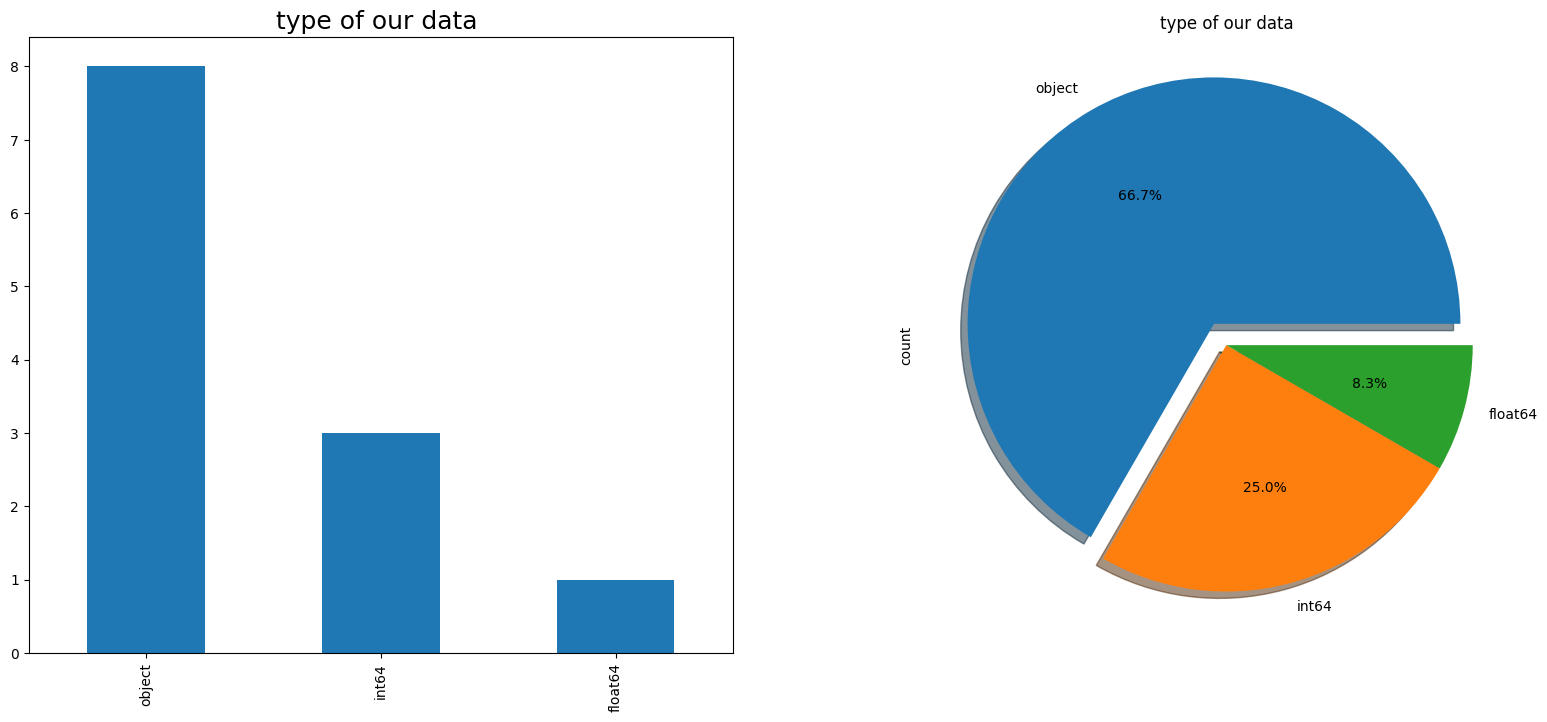

In [11]:
# Buat GRAFIK PERBANDINGAN TIPE DATA
fig, axarr = plt.subplots(1, 2, figsize=(20, 8))

df.dtypes.value_counts().plot.pie(explode=[0.1,0,0],autopct='%1.1f%%',shadow=True,ax=axarr[1])
axarr[1].set_title("type of our data ", fontsize=18)

df.dtypes.value_counts().plot(kind='bar',ax=axarr[0])
plt.title('type of our data');
axarr[0].set_title("type of our data ", fontsize=18)

In [12]:
df.describe()

,quantity,price,freight_value,product_weight_gram
count,49999.000000,4.999900e+04,49999.000000,49980.000000
mean,1.197484,2.607784e+06,104521.390428,2201.830892
std,0.722262,1.388312e+06,55179.844962,3929.896875
min,1.000000,2.000000e+05,9000.000000,50.000000
25%,1.000000,1.410500e+06,57000.000000,300.000000
50%,1.000000,2.610000e+06,104000.000000,800.000000
75%,1.000000,3.810000e+06,152000.000000,1850.000000
max,21.000000,5.000000e+06,200000.000000,40425.000000


### Numerikal

In [13]:
# MENCARI VARIABEL NUMERIKAL
numerical_features = df.select_dtypes(include=[np.number])
print(f"Jumlah variabel numerikal: {numerical_features.shape[1]}")
numerical_features.columns


Jumlah variabel numerikal: 4


Index(['quantity', 'price', 'freight_value', 'product_weight_gram'], dtype='object')

### Kategorikal

In [14]:
# MENCARI VARIABEL KATEGORIKAL
categorical_features = df.select_dtypes(include=[object])
print(f"Jumlah variabel kategorikal: {categorical_features.shape[1]}")
categorical_features.columns


Jumlah variabel kategorikal: 8


Index(['order_id', 'product_id', 'seller_id', 'customer_id', 'order_status',
       'purchase_date', 'payment_type', 'product_category_name'],
      dtype='object')

### Nilai unik

In [15]:
#Tampilkan jumlah nilai unik dari semua kolom pada dataset
df.nunique()

order_id                 42694
quantity                    21
product_id               16866
price                     4801
seller_id                 1777
freight_value              192
customer_id              42694
order_status                 7
purchase_date              356
payment_type                 4
product_category_name        8
product_weight_gram       1532
dtype: int64

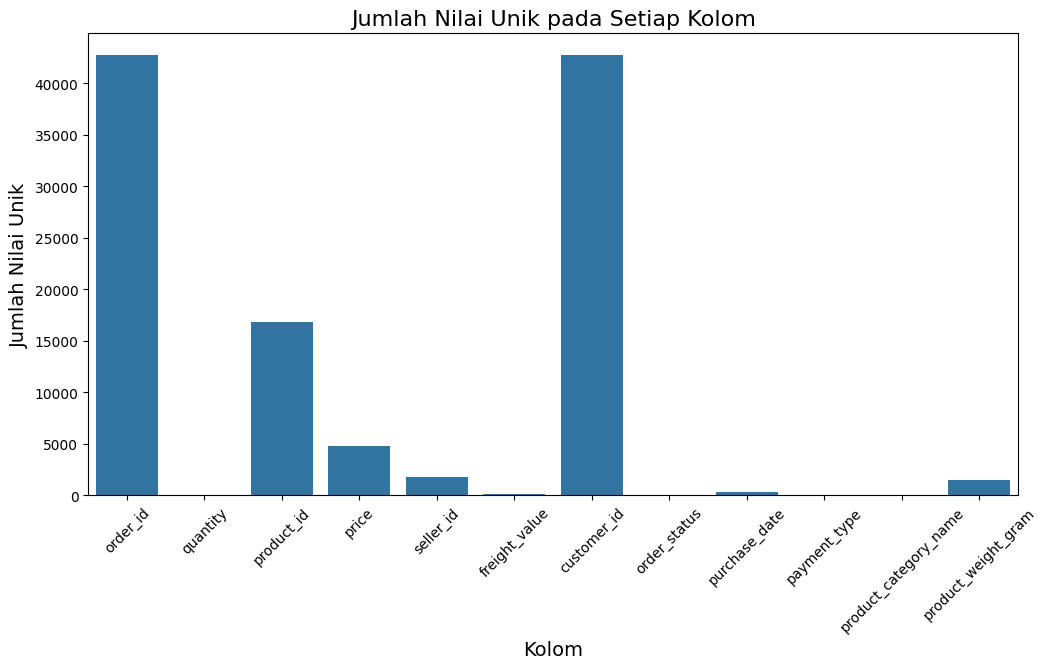

In [16]:
#Visualisasi Nilai unik
plt.figure(figsize=(12,6))
sns.barplot(x=df.nunique().index, y=df.nunique().values)
plt.title('Jumlah Nilai Unik pada Setiap Kolom', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Jumlah Nilai Unik', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Missing value

In [17]:
#Cari missing value pada semua kolom di dataset dengan isnull()
df.isnull().sum()

order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64

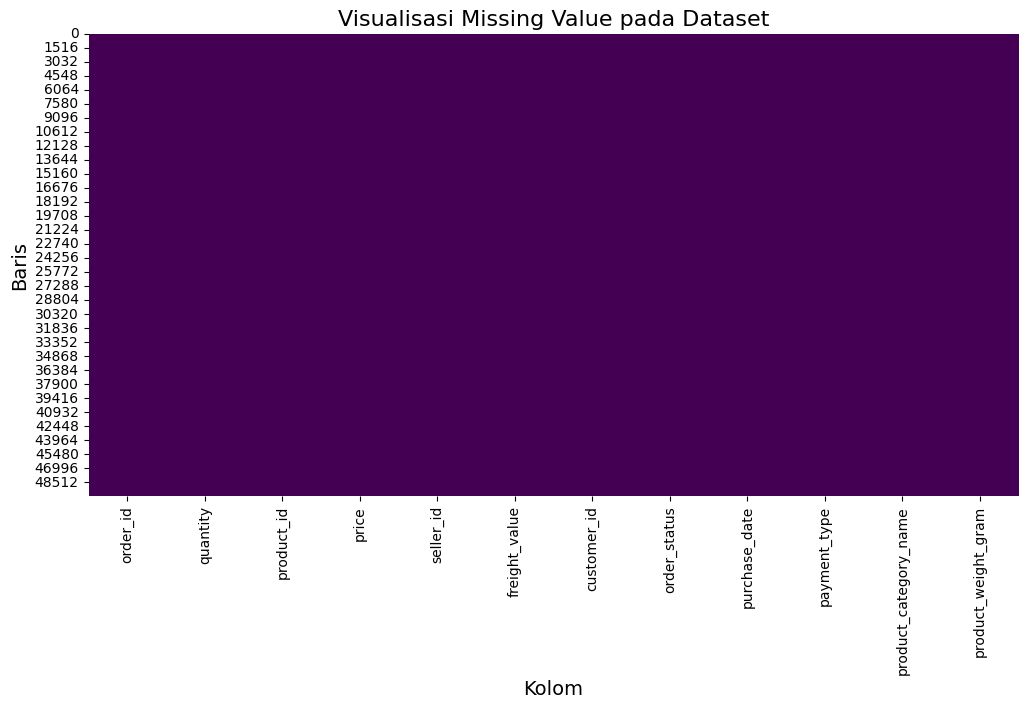

In [18]:
#Visualisasi Missing value
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Value pada Dataset', fontsize=16)
plt.xlabel('Kolom', fontsize=14)
plt.ylabel('Baris', fontsize=14)
plt.show()

### Histogram

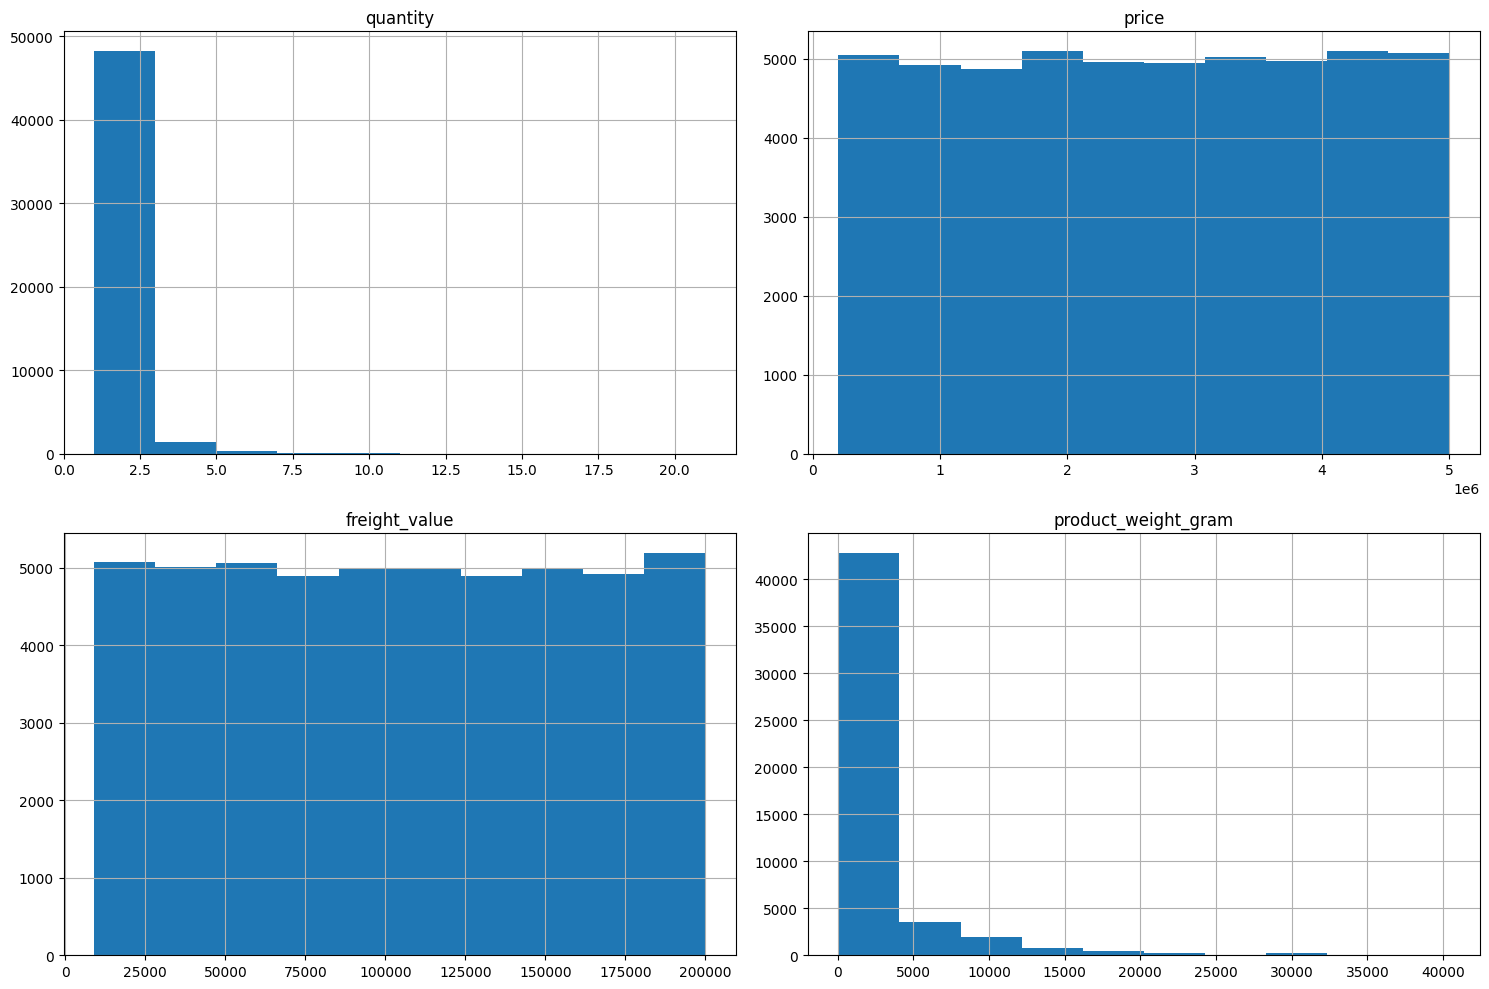

In [19]:
#Menampilkan histogram data atau persebaran data dari semua kolom pada dataset
df.hist(figsize=(15,10))
plt.tight_layout()
plt.show()

### Outlier

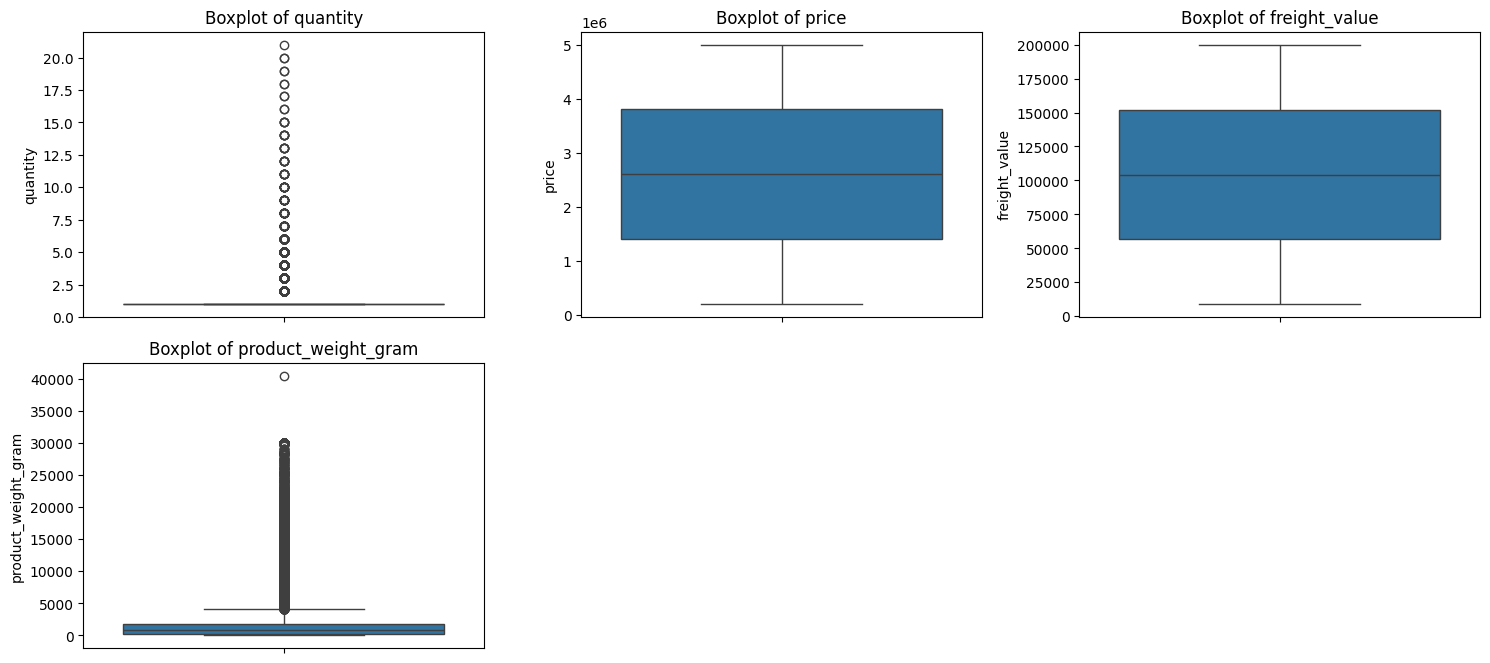

In [20]:
#Menampilkan outliers dalam bentuk grafik (Buat plot boxplot untuk melihat outlier dari semua kolom pada dataset)
plt.figure(figsize=(15,10))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


### Korelasi

In [21]:
#cari nilai korelasi dengan fungsi .corr()
correlation = numerical_features.corr()
correlation

,quantity,price,freight_value,product_weight_gram
quantity,1.000000,-0.001649,-0.009926,-0.009247
price,-0.001649,1.000000,0.005095,0.002746
freight_value,-0.009926,0.005095,1.000000,-0.005212
product_weight_gram,-0.009247,0.002746,-0.005212,1.000000


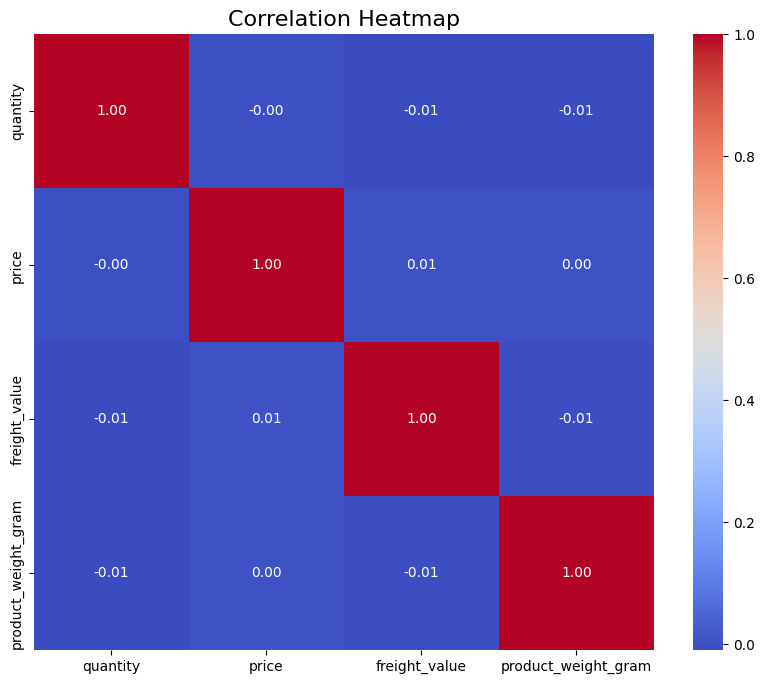

In [22]:
#Visualisasikan dataset dengan fungsi seaborn .heatmap() untuk melihat nilai korelasi
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

Data Preproccesing

Encoding

In [23]:
# ENCODING DATA KATEGORIKAL MENJADI NUMERIKAL
label_encoder = LabelEncoder()
df['potongan'] = label_encoder.fit_transform(df['potongan'])
df['warna'] = label_encoder.fit_transform(df['warna'])
df['kejernihan'] = label_encoder.fit_transform(df['kejernihan'])
label_encoder.classes_
df.head()

KeyError: 'potongan'

Missing Value

In [ ]:
# MISSING DATA KOSONG VARIABEL KATEGORIKAL DENGAN NILAI MODUS
df['potongan'].fillna(df['potongan'].mode()[0], inplace=True)
df['warna'].fillna(df['warna'].mode()[0], inplace=True)
df['kejernihan'].fillna(df['kejernihan'].mode()[0], inplace=True)
df.isnull().sum()
df.info()
# MISSING DATA KOSONG VARIABEL NUMERIKAL DENGAN NILAI MEAN
df['x'] = df['x'].fillna(df['x'].mean())
df['y'] = df['y'].fillna(df['y'].mean())
df['z'] = df['z'].fillna(df['z'].mean())
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  int64  
 3   warna       40455 non-null  int64  
 4   kejernihan  40455 non-null  int64  
 5   kedalaman   40455 non-null  float64
 6   lebar       40455 non-null  float64
 7   x           39248 non-null  float64
 8   y           39174 non-null  float64
 9   z           39200 non-null  float64
 10  harga       40455 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 3.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  40455 non-null  int64  
 1   carat       40455 non-null  float64
 2   potongan    40455 non-null  in

C:\Users\User\AppData\Local\Temp\ipykernel_16144\2857163056.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['potongan'].fillna(df['potongan'].mode()[0], inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_16144\2857163056.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

Outlier

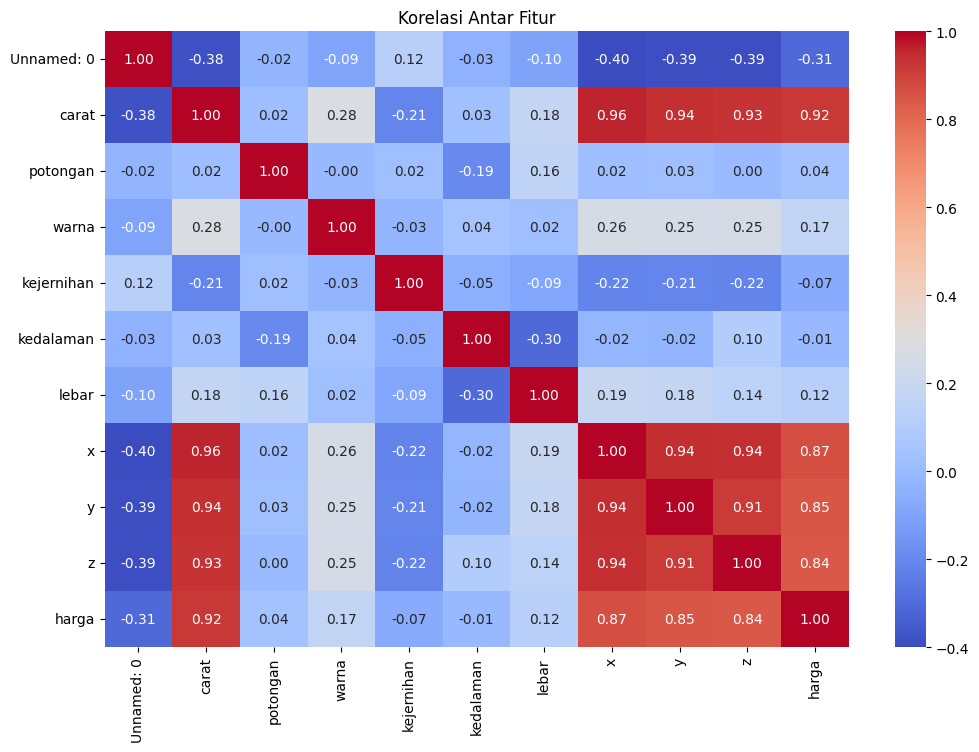

In [ ]:
# Ambil semua kolom numerikal
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Hitung korelasi antar kolom numerikal
correlation_matrix = df[numerical_cols].corr()

# Tampilkan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korelasi Antar Fitur")
plt.show()

In [ ]:
df= df.dropna()  # hapus baris kosong
df= df.drop_duplicates()  # hapus duplikat
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")  # rapikan nama kolom

# 3. Simpan hasilnya
df.to_csv("dataset_rapi.csv", index=False)

print("Dataset berhasil dirapikan dan disimpan ke dataset_rapi.csv")

Dataset berhasil dirapikan dan disimpan ke dataset_rapi.csv


In [ ]:
print(df.isnull().sum())


unnamed:_0    0
carat         0
potongan      0
warna         0
kejernihan    0
kedalaman     0
lebar         0
x             0
y             0
z             0
harga         0
dtype: int64


In [ ]:
print("Jumlah data duplikat:", df.duplicated().sum())


Jumlah data duplikat: 0


In [ ]:
import pandas as pd

# contoh: dataset berlian
df = pd.read_csv("dataset_rapi.csv")

# hitung korelasi
corr = df.corr(numeric_only=True)

print(corr)



            unnamed:_0     carat  potongan     warna  kejernihan  kedalaman  \
unnamed:_0    1.000000 -0.379342 -0.023890 -0.094941    0.120670  -0.034434   
carat        -0.379342  1.000000  0.017034  0.281410   -0.211025   0.031192   
potongan     -0.023890  0.017034  1.000000 -0.004036    0.024333  -0.193972   
warna        -0.094941  0.281410 -0.004036  1.000000   -0.027298   0.044087   
kejernihan    0.120670 -0.211025  0.024333 -0.027298    1.000000  -0.053246   
kedalaman    -0.034434  0.031192 -0.193972  0.044087   -0.053246   1.000000   
lebar        -0.103152  0.178222  0.156171  0.024381   -0.089894  -0.303186   
x            -0.400375  0.960644  0.020074  0.258500   -0.219108  -0.020533   
y            -0.390736  0.935158  0.025715  0.251361   -0.211768  -0.024823   
z            -0.390927  0.933751  0.000323  0.254119   -0.217325   0.097907   
harga        -0.307123  0.921537  0.039935  0.165956   -0.068302  -0.005717   

               lebar         x         y         z 

In [ ]:
# Ambil hanya korelasi dengan kolom 'harga'
corr_target = corr["harga"].sort_values(ascending=False)
print("Korelasi terhadap harga:")
print(corr_target)



Korelasi terhadap harga:
harga         1.000000
carat         0.921537
x             0.870697
y             0.848285
z             0.842193
warna         0.165956
lebar         0.123910
potongan      0.039935
kedalaman    -0.005717
kejernihan   -0.068302
unnamed:_0   -0.307123
Name: harga, dtype: float64


In [ ]:
threshold = 0.3
selected_features = corr_target[abs(corr_target) >= threshold].index.tolist()

print("\nFitur terpilih berdasarkan korelasi:")
print(selected_features)




Fitur terpilih berdasarkan korelasi:
['harga', 'carat', 'x', 'y', 'z', 'unnamed:_0']


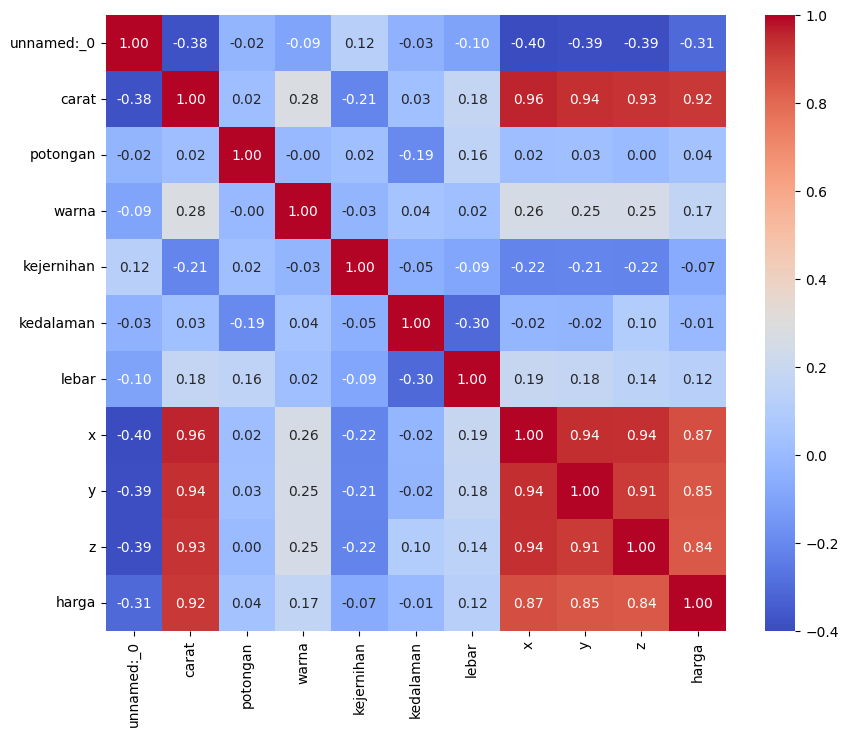

In [ ]:


plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
